# Market Customer Personality Analysis

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Steps followed in this notebook:

1. Detailed descriptions of customers
2. CLustering
3. Descriptives among clusters


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# FILE_PATH = '/content/drive/MyDrive/PES/ML3/Session-2'

In [ ]:
# import os
# os.chdir(FILE_PATH)

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
market = pd.read_csv('marketing-campaign.csv')
market = market.drop(['ID','Dt_Customer'], axis=1)

## Descriptive Statistics

In [3]:
market.head(n=10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,1967,Master,Together,62513.0,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,1971,Graduation,Divorced,55635.0,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,1985,PhD,Married,33454.0,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,1974,PhD,Together,30351.0,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,1950,PhD,Together,5648.0,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [4]:
market.shape

(2240, 27)

In [5]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

In [6]:
market.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Introduction to Data

The customer data has 2240 rows and 28 columns. I checked and deleted the  cell after, each row is for a different customer, there are no duplicates in the data.

From the descriptives table, we see none of the columns have missings, and no values below 0.

However, we might need a deeper knowledge about what the columns are ; such as AcceptedCmp, Recency, Z_CostContact and Response. We don't know what these columns are.

Quick insights :
Income column's higher value is 6666666, and percentiles are in between 35k to 68k. The highest value is a possible outlier.

Mean Web site visits per month is 5 for 2k customers. The max value is 20.

AcceptedCmp columns are binomial, 0 and 1.



#### Creating New Columns

In [7]:
# total number of children
market['no_children'] = market['Kidhome'] + market['Teenhome']
# total items bought
market['total_items_bought'] = market['MntWines'] + market['MntFruits'] + market['MntMeatProducts'] + market['MntFishProducts'] + market['MntSweetProducts'] + market['MntGoldProds']
# total number of purchases
market['total_nbr_purchases'] = market['NumDealsPurchases'] + market['NumWebPurchases'] + market['NumCatalogPurchases'] + market['NumStorePurchases']
#customer age
market['age'] = 2026 - market['Year_Birth']

market = market.drop(['Year_Birth'], axis=1)

In [8]:
market.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,no_children,total_items_bought,total_nbr_purchases,age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,0.950446,605.798214,14.862054,57.194196
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.751803,602.249288,7.677173,11.984069
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,5.000000,0.000000,30.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,68.750000,8.000000,49.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,396.000000,15.000000,56.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,1045.500000,21.000000,67.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,3.000000,2525.000000,44.000000,133.000000


128 years old, earns 666666k money. The first one is not likely to occur, second one is outlier. Lets see who is earning 66666k money.

In [9]:
market[market['Income']>600000]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,no_children,total_items_bought,total_nbr_purchases,age
2233,Graduation,Together,666666.0,1,0,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0,1,62,11,49


In [10]:
market[market['age']>90]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,no_children,total_items_bought,total_nbr_purchases,age
192,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,1,65,6,126
239,2n Cycle,Single,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,1,22,4,133
339,PhD,Together,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,0,1853,15,127


In [11]:
market = market[market['Income']<600000]
market = market[market['age']<90]

## Visuals

In [12]:
def hist_with_vline(data, column):
    """This function gets data and column name.
    Plots a histogram with 100 bins, draws a Vline of the column mean and median"""

    plt.figure(figsize=(12,6))
    _ = sns.histplot(market[column], bins= 100)
    plt.title('Histogram of ' + column)
    miny, y_lim = plt.ylim()
    plt.text(s = f"Mean  {column} : {market[column].mean():.2f}", x =market[column].mean() * 1.1,  y = y_lim * 0.95, color = 'r')
    _ =plt.axvline(market[column].mean(), color = 'r')
    _ = plt.axvline(market[column].median())
    plt.text(s = f"Median {column} : {market[column].median():.2f}", x= market[column].median() * 1.1, y= y_lim * 0.90, color = 'b')

First Income:

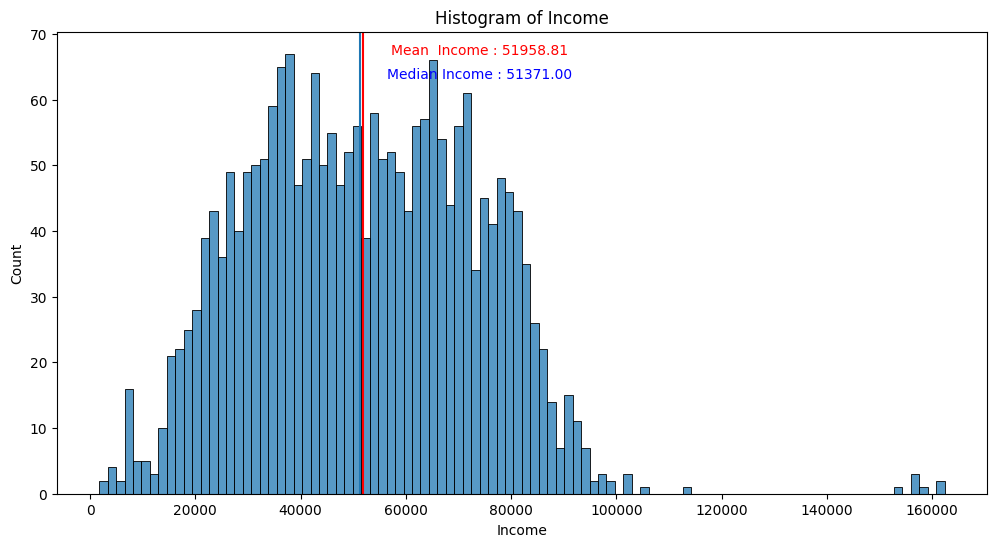

In [13]:
hist_with_vline(market, 'Income')

The customers earn more than 120k; these ones are outliers too --> remove

In [14]:
market = market[market['Income']<120000]

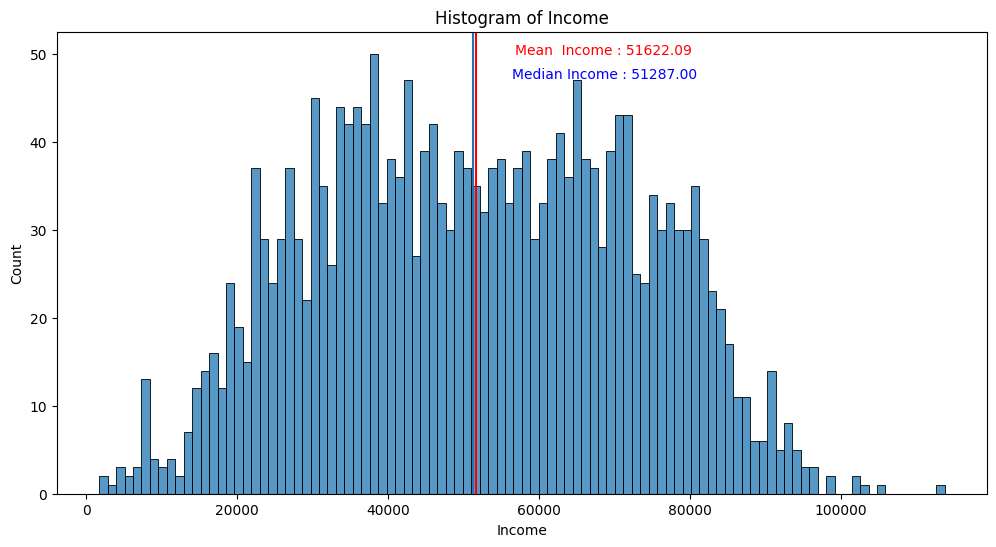

In [15]:
hist_with_vline(market, 'Income')

### Observation

Most of the customers earn between 40k to 70k.

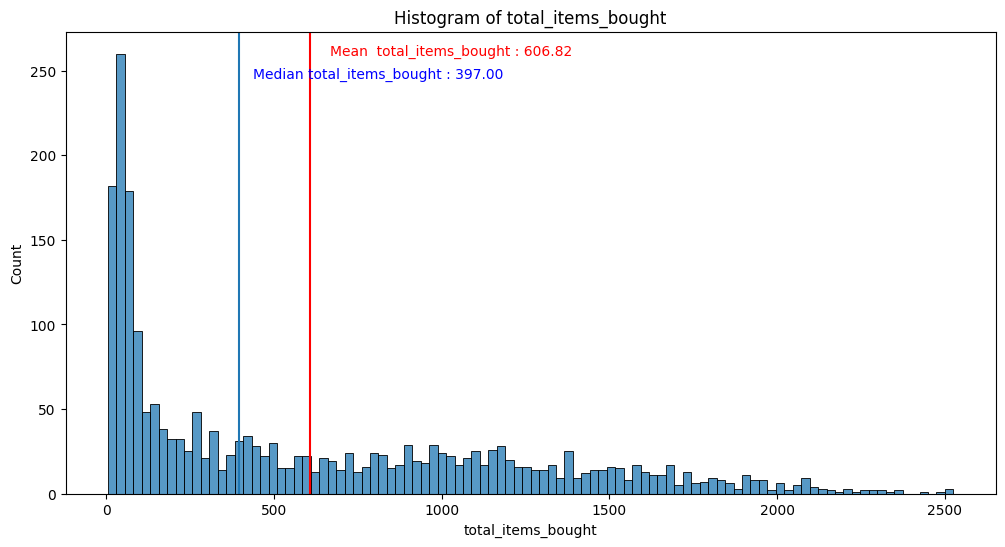

In [16]:
hist_with_vline(market, 'total_items_bought')

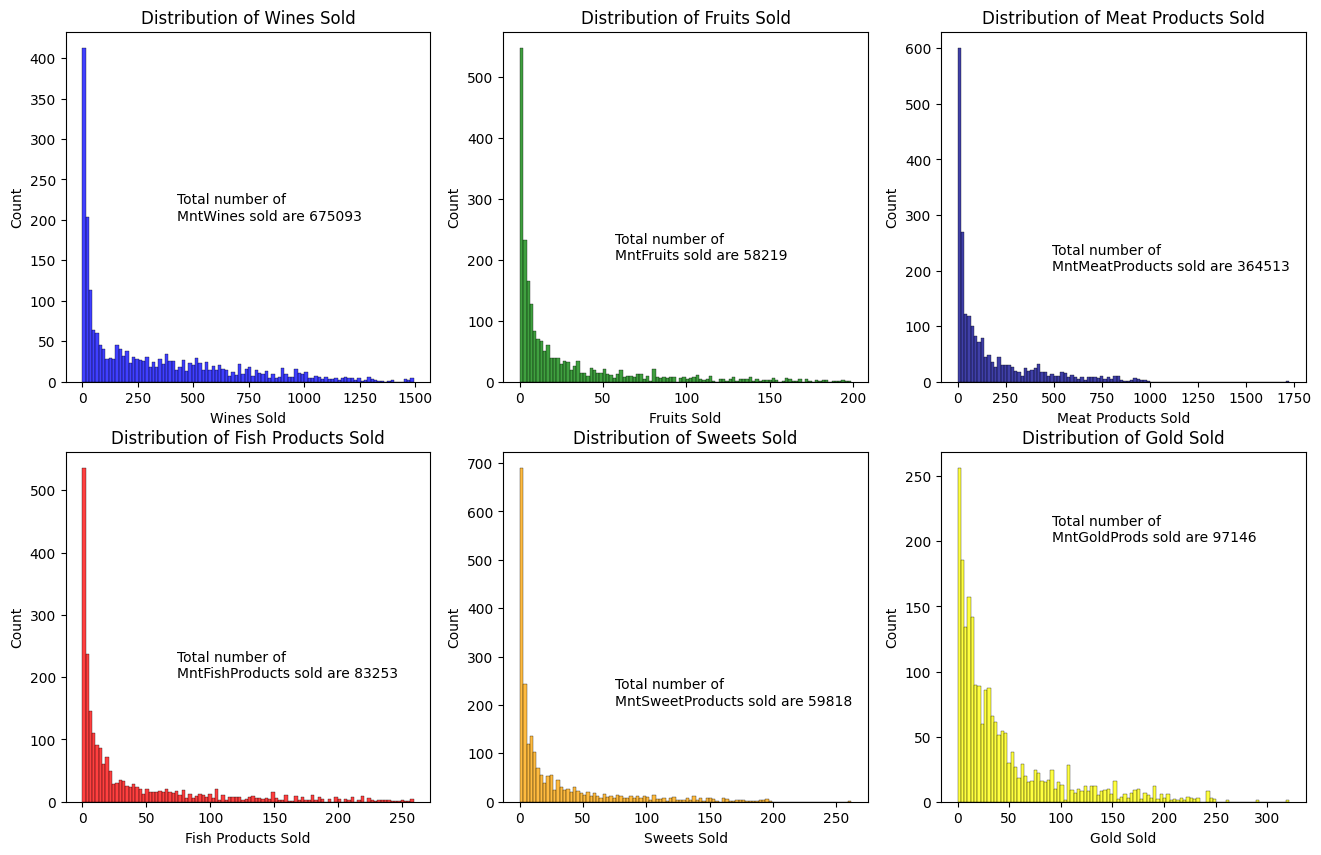

In [17]:
columns = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']
titles = ['Wines Sold', 'Fruits Sold', 'Meat Products Sold', 'Fish Products Sold', 'Sweets Sold', 'Gold Sold']
colors = ['blue', 'green', 'darkblue','red','orange','yellow']

fig, ax = plt.subplots(2,3, figsize=(16,10))
for i in range(len(columns)):
    sns.histplot(market[columns[i]], bins= 100, ax = ax[i//3, i%3],color=colors[i])
    ax[i//3, i%3].set_title('Distribution of ' + titles[i])
    ax[i//3, i%3].set_xlabel(titles[i])
    ax[i//3, i%3].text(s = f"Total number of \n{columns[i]} sold are {market[columns[i]].sum()} ",
                       x = market[columns[i]].max()/3.5, y = 200)


All the sold products histograms are right skewed. Majority of the customers buys items lower than certain amounts.

On the other hand, Wines are the most sold items (675k) and Meat producs follow with 364k, while the Fruit and Sweet products are the least sold items (58k and 59k respectively).

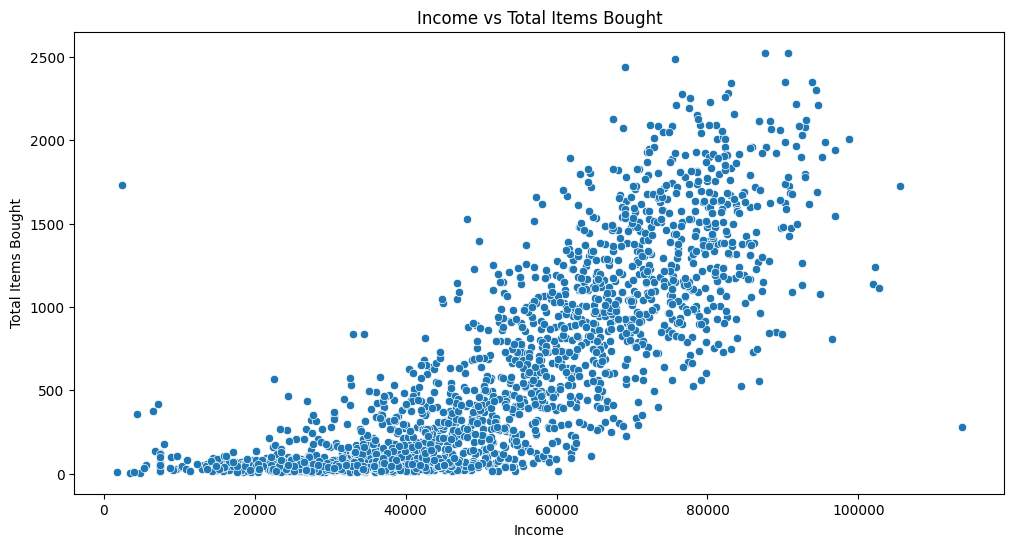

In [18]:
plt.figure(figsize=(12,6))

_ = sns.scatterplot(x ='Income',y = 'total_items_bought', data = market)
_ = plt.title('Income vs Total Items Bought')
_ = plt.ylabel('Total Items Bought')

There is a positive corrleation income and number of items bought.

In [19]:
px.scatter(market,
           x = 'Income',
           y= 'total_items_bought',
           color = 'Education',
           title = 'Income According to Educational Status', )

In [20]:
market.Education.value_counts()

Education
Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: count, dtype: int64

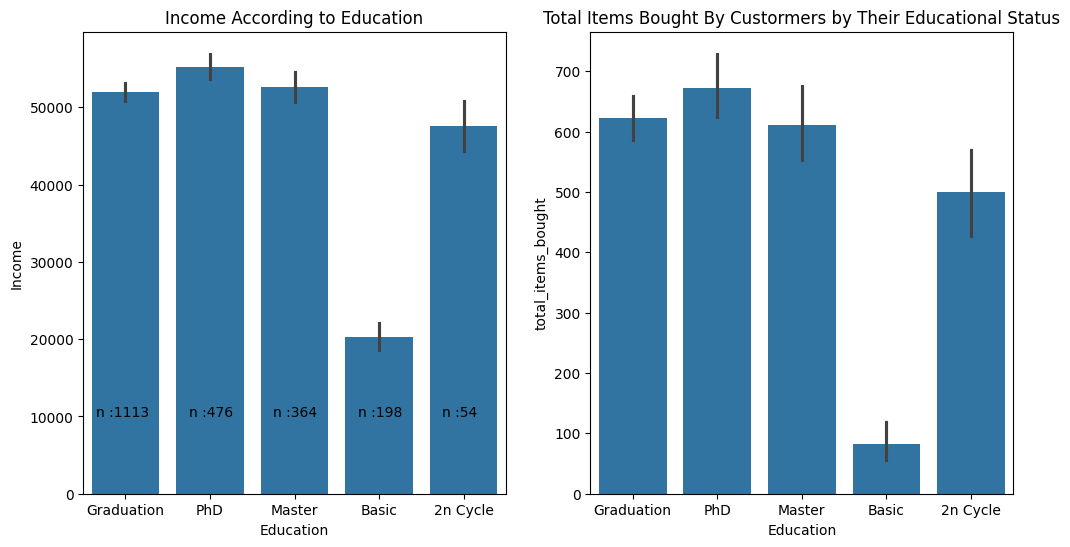

In [21]:
fig, (ax0, ax1 )= plt.subplots(1,2 , figsize=(12,6))
_= sns.barplot(x = 'Education', y = 'Income', data = market, ax = ax0)
ax0.set_title('Income According to Education')
_ = sns.barplot(x = 'Education', y = 'total_items_bought', data = market, ax=ax1)
ax1.set_title('Total Items Bought By Custormers by Their Educational Status')

_ = ax0.text(s = f"n :{market.Education.value_counts()[0]}", x = -0.35, y = 10000)
_ = ax0.text(s = f"n :{market.Education.value_counts()[1]}", x = 0.75, y = 10000)
_ = ax0.text(s = f"n :{market.Education.value_counts()[2]}", x = 1.75, y = 10000)
_ = ax0.text(s = f"n :{market.Education.value_counts()[3]}", x = 2.75, y = 10000)
_ = ax0.text(s = f"n :{market.Education.value_counts()[4]}", x = 3.75, y = 10000)

Customers with a PhD earn and spend more than any other customers with different educational background. And, not so surprisingly Basic level educated customers earn and spend the least amount of money.

And when we investigate the number of customers in each group, it is wise to investigate what customers buy with different educational backgrounds.

In [22]:
px.scatter(market,
           x = 'Income',
           y= 'total_items_bought',
           color = 'Marital_Status',
           title = 'Income According to Marital Status', )


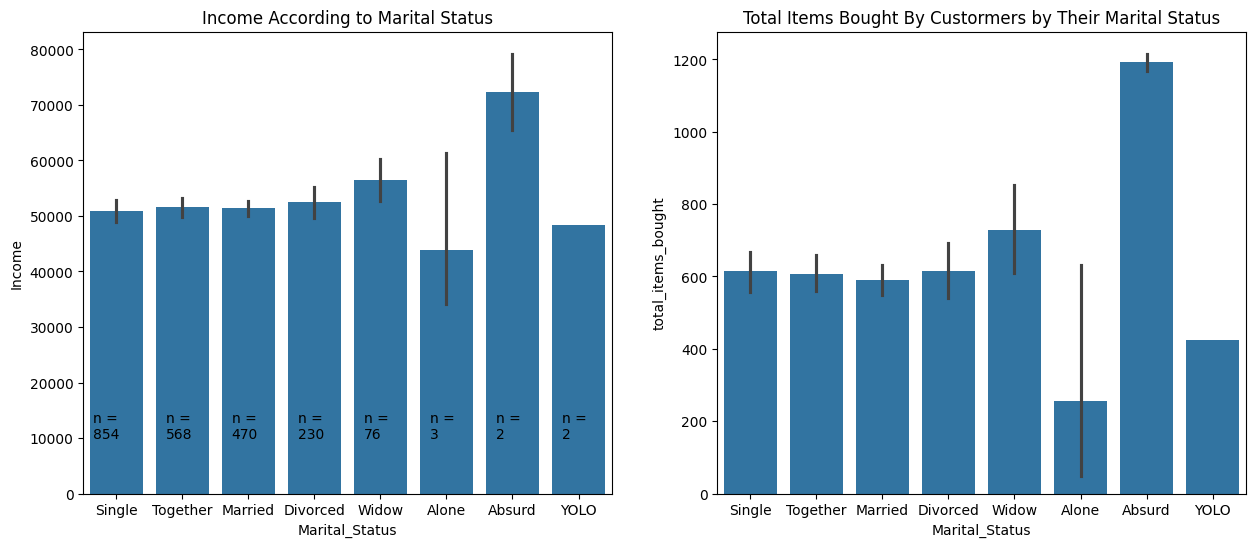

In [23]:
fig, (ax0, ax1 )= plt.subplots(1,2 , figsize=(15,6))
_ = sns.barplot(x = 'Marital_Status', y = 'Income', data = market, ax = ax0)
_ = ax0.set_title('Income According to Marital Status')
_ = sns.barplot(x = 'Marital_Status', y = 'total_items_bought', data = market, ax=ax1)
_ = ax1.set_title('Total Items Bought By Custormers by Their Marital Status')

_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[0]}", x = -0.35, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[1]}", x = 0.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[2]}", x = 1.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[3]}", x = 2.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[4]}", x = 3.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[5]}", x = 4.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[6]}", x = 5.75, y = 10000)
_ = ax0.text(s = f"n = \n{market.Marital_Status.value_counts()[7]}", x = 6.75, y = 10000)


In [24]:
df_numeric = market.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()


<Axes: >

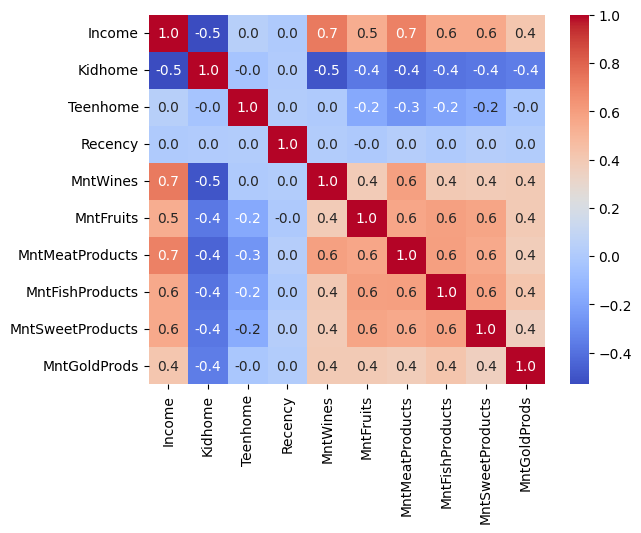

In [25]:
sns.heatmap(correlation_matrix.iloc[0:10,0:10], annot=True, cmap='coolwarm', fmt=".1f")

<Axes: >

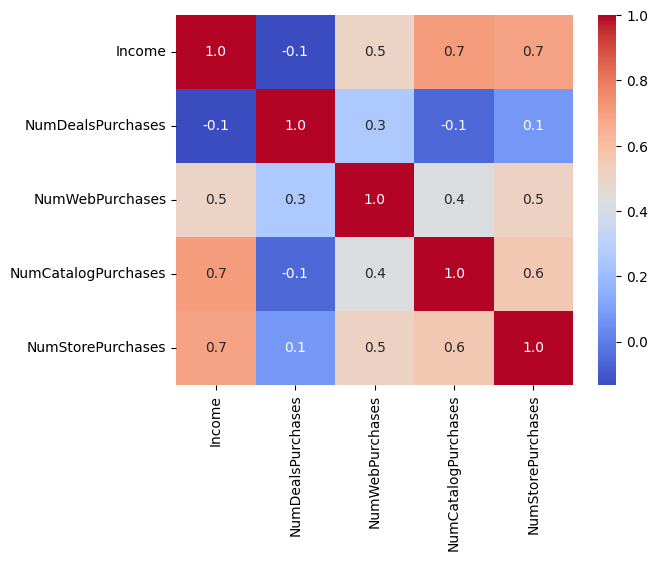

In [26]:
sns.heatmap(correlation_matrix.iloc[np.r_[0, 10:14],np.r_[0, 10:14]], annot=True, cmap='coolwarm', fmt=".1f")

In [27]:
# Identify numeric columns suitable for mean and sum
# Exclude 'Education' (grouping key), 'Marital_Status' (object type),
# and constant/label columns such as 'Z_CostContact', 'Z_Revenue', and 'clusters'.
cols_to_agg = [col for col in market.columns if col not in ['Education', 'Marital_Status', 'Z_CostContact', 'Z_Revenue', 'clusters'] and market[col].dtype != 'object']

market.groupby(['Education'])[cols_to_agg].agg(['mean', 'sum'])

Income               Kidhome       Teenhome         Recency  \
                    mean         sum      mean  sum      mean  sum       mean   
Education                                                                       
2n Cycle    47625.333333   9429816.0  0.474747   94  0.409091   81  48.383838   
Basic       20306.259259   1096538.0  0.629630   34  0.092593    5  48.444444   
Graduation  51984.008086  57858201.0  0.441150  491  0.493261  549  49.909254   
Master      52629.579670  19157167.0  0.456044  166  0.535714  195  47.346154   
PhD         55220.581933  26284997.0  0.399160  190  0.602941  287  48.500000   

                     MntWines          MntFruits        MntMeatProducts  \
              sum        mean     sum       mean    sum            mean   
Education                                                                 
2n Cycle     9580  202.757576   40146  29.626263   5866      136.378788   
Basic        2616    7.240741     391  11.111111    600       11.444444   
Graduation  55549  285.804133  318100  30.930818  34426      179.312668   
Master      17234  333.788462  121499  21.431319   7801      163.343407   
PhD         23086  409.573529  194957  20.012605   9526      163.571429   

                   MntFishProducts        MntSweetProducts         \
               sum            mean    sum             mean    sum   
Education                                                           
2n Cycle     27003       48.454545   9594        35.055556   6941   
Basic          618       17.055556    921        12.111111    654   
Graduation  199575       43.523810  48442        31.367475  34912   
Master       59457       31.574176  11493        20.865385   7595   
PhD          77860       26.897059  12803        20.411765   9716   

           MntGoldProds        NumDealsPurchases       NumWebPurchases        \
                   mean    sum              mean   sum            mean   sum   
Education                                                                      
2n Cycle      47.217172   9349          2.272727   450        3.787879   750   
Basic         22.833333   1233          1.796296    97        1.888889   102   
Graduation    50.807727  56549          2.314465  2576        4.123989  4590   
Master        40.277473  14661          2.431319   885        4.043956  1472   
PhD           32.256303  15354          2.319328  1104        4.470588  2128   

           NumCatalogPurchases       NumStorePurchases        \
                          mean   sum              mean   sum   
Education                                                      
2n Cycle              2.373737   470          5.595960  1108   
Basic                 0.481481    26          2.851852   154   
Graduation            2.719677  3027          5.854447  6516   
Master                2.552198   929          5.901099  2148   
PhD                   2.901261  1381          6.123950  2915   

           NumWebVisitsMonth       AcceptedCmp3     AcceptedCmp4      \
                        mean   sum         mean sum         mean sum   
Education                                                              
2n Cycle            5.469697  1083     0.075758  15     0.045455   9   
Basic               6.870370   371     0.111111   6     0.000000   0   
Graduation          5.292902  5891     0.070081  78     0.070979  79   
Master              5.217033  1899     0.065934  24     0.085165  31   
PhD                 5.302521  2524     0.084034  40     0.094538  45   

           AcceptedCmp5     AcceptedCmp1     AcceptedCmp2      Complain      \
                   mean sum         mean sum         mean sum      mean sum   
Education                                                                     
2n Cycle       0.050505  10     0.070707  14     0.010101   2  0.015152   3   
Basic          0.000000   0     0.000000   0     0.000000   0  0.000000   0   
Graduation     0.077269  86     0.071878  80     0.014376  16  0.012579  14   
Master    

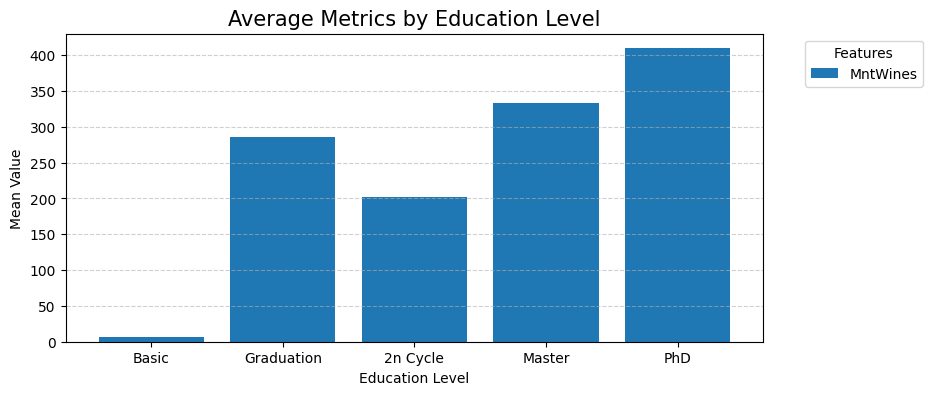

In [28]:
# 1. Group by Education and calculate the mean for all numerical columns
# Note: Ensure you've handled the "2n Cycle" mapping we discussed!
edu_means = market.groupby('Education').mean(numeric_only=True)

# 2. Reorder the index so the plot follows educational progression
# This makes the "function of education" much easier to read
edu_order = ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']
# Filter edu_order to only include levels actually present in your df
edu_order = [e for e in edu_order if e in edu_means.index]
edu_means = edu_means.reindex(edu_order)

# 3. Plotting
# We use subplots if you have many columns, or just plot them together
# if you only have a few (like 'Income' and 'Recency')
ax = edu_means['MntWines'].plot(kind='bar', figsize=(9, 4), width=0.8)

# 4. Formatting
plt.title('Average Metrics by Education Level', fontsize=15)
plt.xlabel('Education Level')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)


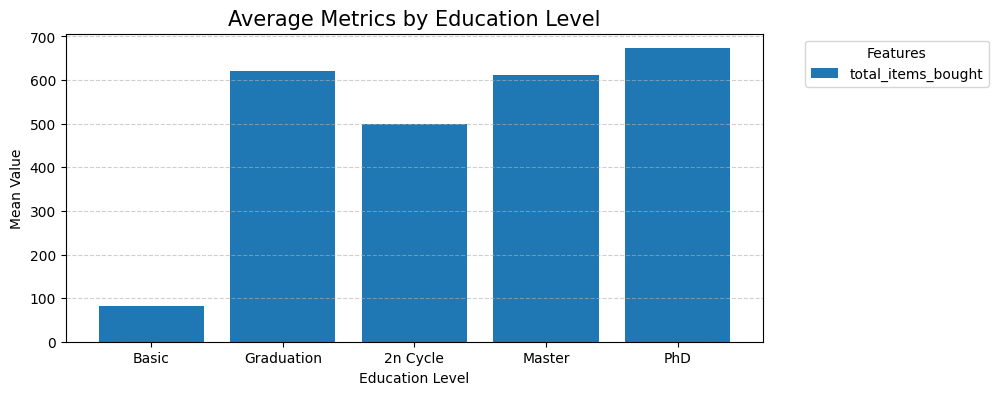

In [138]:
ax = edu_means['total_items_bought'].plot(kind='bar', figsize=(9, 4), width=0.8)

# 4. Formatting
plt.title('Average Metrics by Education Level', fontsize=15)
plt.xlabel('Education Level')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

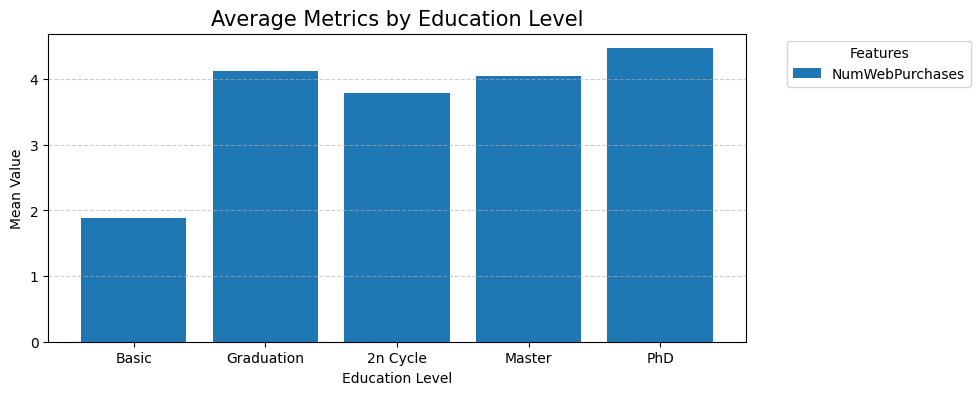

In [29]:
ax = edu_means['NumWebPurchases'].plot(kind='bar', figsize=(9, 4), width=0.8)

# 4. Formatting
plt.title('Average Metrics by Education Level', fontsize=15)
plt.xlabel('Education Level')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

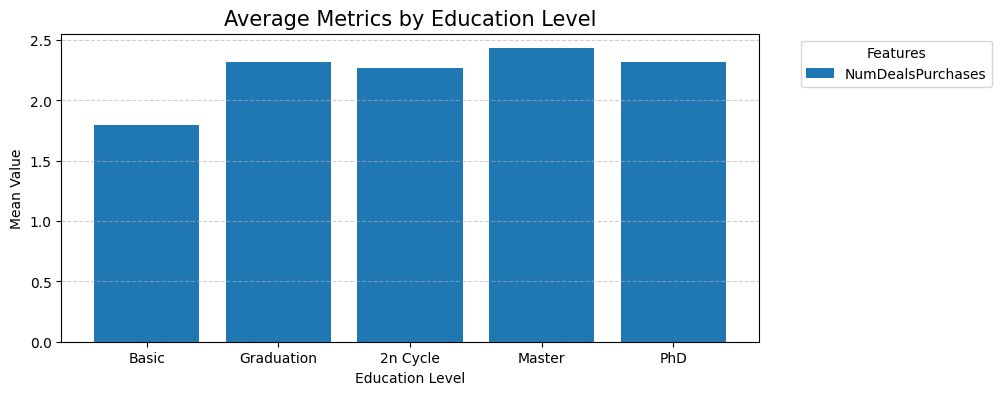

In [30]:
ax = edu_means['NumDealsPurchases'].plot(kind='bar', figsize=(9, 4), width=0.8)

# 4. Formatting
plt.title('Average Metrics by Education Level', fontsize=15)
plt.xlabel('Education Level')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

In [31]:
edu_means.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'no_children', 'total_items_bought', 'total_nbr_purchases', 'age'],
      dtype='object')

### Does Children effect market shopping?

Text(2.65, 50, 'Mean Sales: \n255.50')

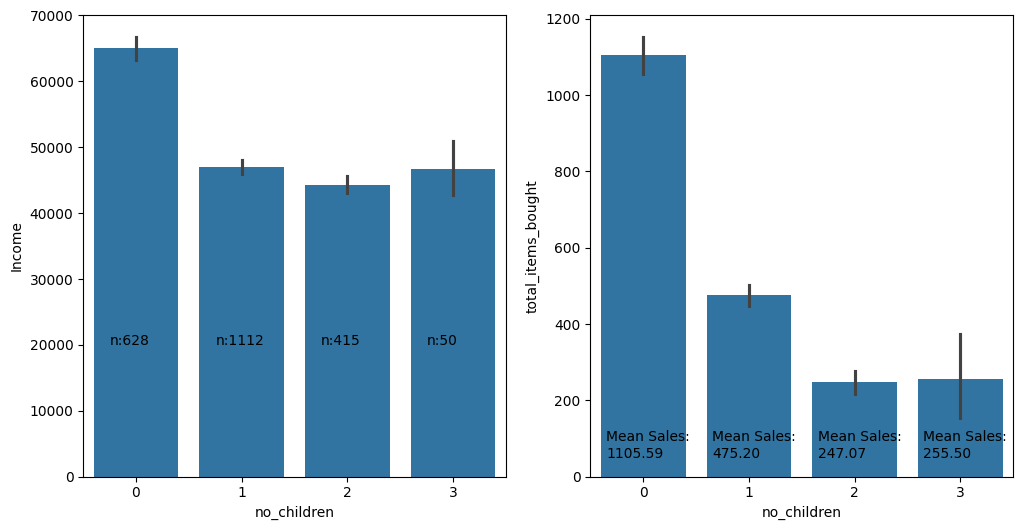

In [33]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(12,6), sharex=True)
_ = sns.barplot(x= market.no_children, y= market.Income, ax=ax0)
_ = sns.barplot(x= market.no_children, y= market.total_items_bought, ax=ax1)
ax0.text(s= f"n:{market[market['no_children']==0]['no_children'].count()}", x = -0.25, y = 20000)
ax0.text(s= f"n:{market[market['no_children']==1]['no_children'].count()}", x = 0.75, y = 20000)
ax0.text(s= f"n:{market[market['no_children']==2]['no_children'].count()}", x = 1.75, y = 20000)
ax0.text(s= f"n:{market[market['no_children']==3]['no_children'].count()}", x = 2.75, y = 20000)

ax1.text(s = f"Mean Sales: \n{market[market['no_children']==0]['total_items_bought'].mean():.2f}", x = -0.35, y = 50)
ax1.text(s = f"Mean Sales: \n{market[market['no_children']==1]['total_items_bought'].mean():.2f}", x = 0.65, y = 50)
ax1.text(s = f"Mean Sales: \n{market[market['no_children']==2]['total_items_bought'].mean():.2f}", x = 1.65, y = 50)
ax1.text(s = f"Mean Sales: \n{market[market['no_children']==3]['total_items_bought'].mean():.2f}", x = 2.65, y = 50)

The families with no children earn and spend more than families with children.

## Clustering

### Scaling the data

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
ss = StandardScaler()

In [35]:
ss_market = market.copy()

cols = ss_market.select_dtypes(exclude='object').columns
ss_market[cols] = ss.fit_transform(ss_market[cols])

In [36]:
# getting categorical columns and their indices.
catColumnsPos = [ss_market.columns.get_loc(col) for col in list(ss_market.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(ss_market.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Education', 'Marital_Status']
Categorical columns position  : [0, 1]


In [37]:
!pip install kmodes

In [38]:
from kmodes.kprototypes import KPrototypes

dfMatrix = ss_market.to_numpy()

In [39]:
cost = []
for x in range(2,16):
    kprototype = KPrototypes(n_jobs = -1, n_clusters = x, init = 'Cao', random_state = 0)
    clusters = kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
    cost.append(kprototype.cost_)
    print('Cluster initiation: {}'.format(clusters))

Cluster initiation: [0 1 0 ... 0 0 1]
Cluster initiation: [0 2 1 ... 1 1 2]
Cluster initiation: [0 2 0 ... 0 1 2]
Cluster initiation: [4 1 4 ... 4 3 1]
Cluster initiation: [2 1 2 ... 2 5 1]
Cluster initiation: [6 4 1 ... 6 1 4]
Cluster initiation: [6 1 3 ... 3 3 1]
Cluster initiation: [6 1 7 ... 7 7 1]
Cluster initiation: [9 1 3 ... 9 3 1]
Cluster initiation: [9 1 3 ... 9 3 1]
Cluster initiation: [ 4  2  1 ...  3  6 10]
Cluster initiation: [12  8  2 ... 11  4  8]
Cluster initiation: [10 11 10 ...  3  7 11]
Cluster initiation: [ 7 11  7 ...  8  3 11]


In [40]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame()
df_cost['clusters'] = range(2,16)
df_cost['cost'] = cost

<Axes: xlabel='clusters', ylabel='cost'>

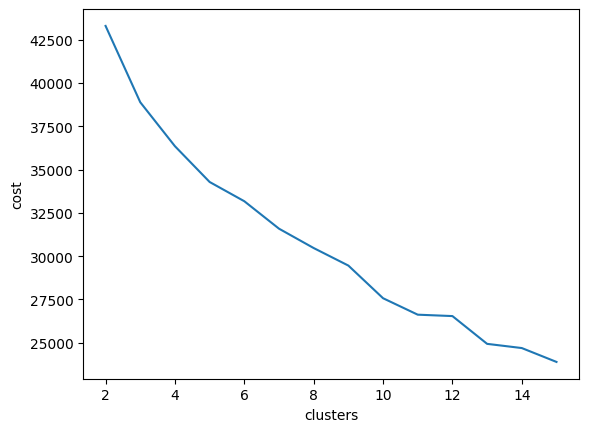

In [41]:
# elbow method for number of clusters
sns.lineplot(x='clusters', y= 'cost', data=df_cost)

I'll go with 4 clusters. Let's see how their purchasing behaviours are.

In [42]:
# Kmeans tuned
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
clusters = kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

In [43]:
market['clusters'] = clusters

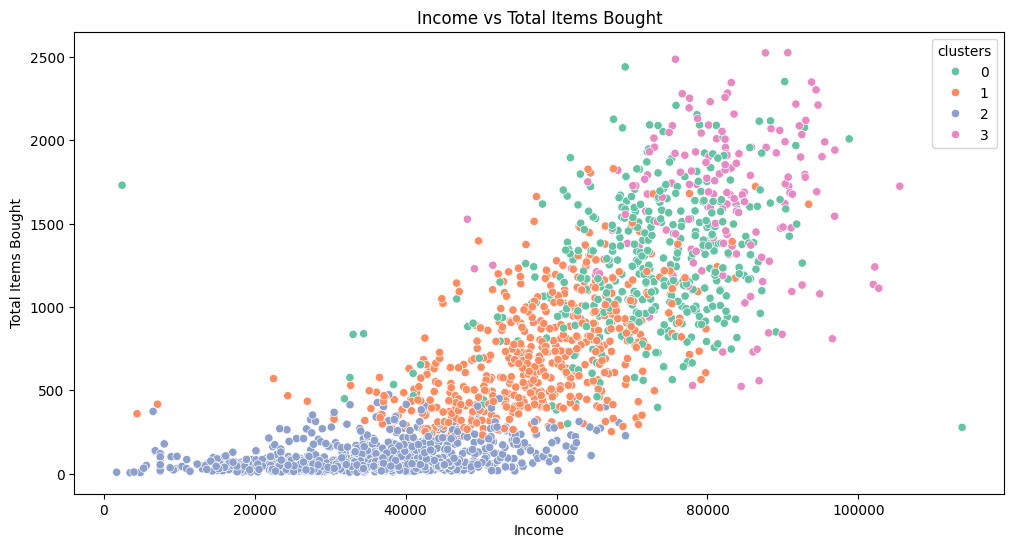

In [44]:
plt.figure(figsize=(12,6))

_ = sns.scatterplot(x ='Income',
                    y = 'total_items_bought',
                    data = market,
                    hue='clusters',
                   palette = 'Set2')
_ = plt.title('Income vs Total Items Bought')
_ = plt.ylabel('Total Items Bought')

Now our clusters are set, we need to visualize and get descriptives of the data according to clusters.





Let's see specifications of these clusters:

In [45]:
# Identify numeric columns suitable for mean and sum
# Exclude 'Education' (object type), 'Marital_Status' (object type),
# and constant/label columns such as 'Z_CostContact', 'Z_Revenue'.
# The 'clusters' column is the grouping key, so it should not be in cols_for_cluster_agg.
cols_for_cluster_agg = [col for col in market.columns if col not in ['Education', 'Marital_Status', 'Z_CostContact', 'Z_Revenue', 'clusters', 'Kidhome','Teenhome', 'Recency' ] and market[col].dtype != 'object']
df=market.groupby(['clusters'])[cols_for_cluster_agg].agg(['mean'])

In [46]:
df.head()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,no_children,total_items_bought,total_nbr_purchases,age
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusters,,,,,,,,,,,,,,,,,,,,,,,
0,72011.923077,506.599548,72.131222,412.934389,104.330317,70.631222,76.536199,1.445701,5.253394,5.622172,8.479638,3.015837,0.052036,0.029412,0.000000,0.090498,0.000000,0.009050,0.156109,0.264706,1243.162896,20.800905,58.201357
1,57160.939446,444.723183,19.946367,129.044983,26.785467,20.773356,58.669550,3.939446,6.316609,2.977509,7.636678,5.835640,0.062284,0.128028,0.005190,0.029412,0.012111,0.005190,0.115917,1.228374,699.942907,20.870242,61.442907
2,34215.416667,39.633929,4.911706,22.539683,7.355159,5.058532,15.419643,1.995040,2.080357,0.539683,3.194444,6.473214,0.075397,0.009921,0.000000,0.000992,0.001984,0.011905,0.089286,1.226190,94.918651,7.809524,54.279762
3,81747.378531,871.045198,55.689266,478.463277,80.468927,64.932203,78.322034,1.045198,5.491525,6.118644,8.242938,3.033898,0.158192,0.378531,0.892655,0.474576,0.118644,0.005650,0.604520,0.163842,1628.920904,20.898305,56.175141


In [47]:
df_normalized = df / df.max()

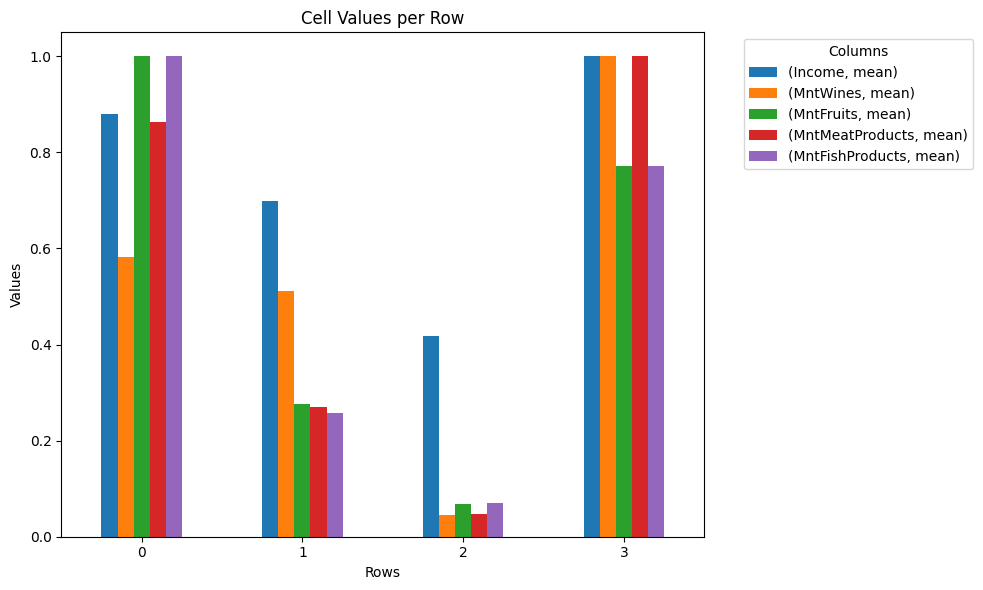

In [48]:
ax = df_normalized.iloc[:, 0:5].plot(kind='bar', figsize=(10, 6))

# 3. Add labels and formatting
plt.title('Cell Values per Row')
plt.xlabel('Rows')
plt.ylabel('Values')
plt.xticks(rotation=0) # Keeps row labels horizontal
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 4. Save or show the plot
plt.savefig('barplot_rows.png')
plt.show()

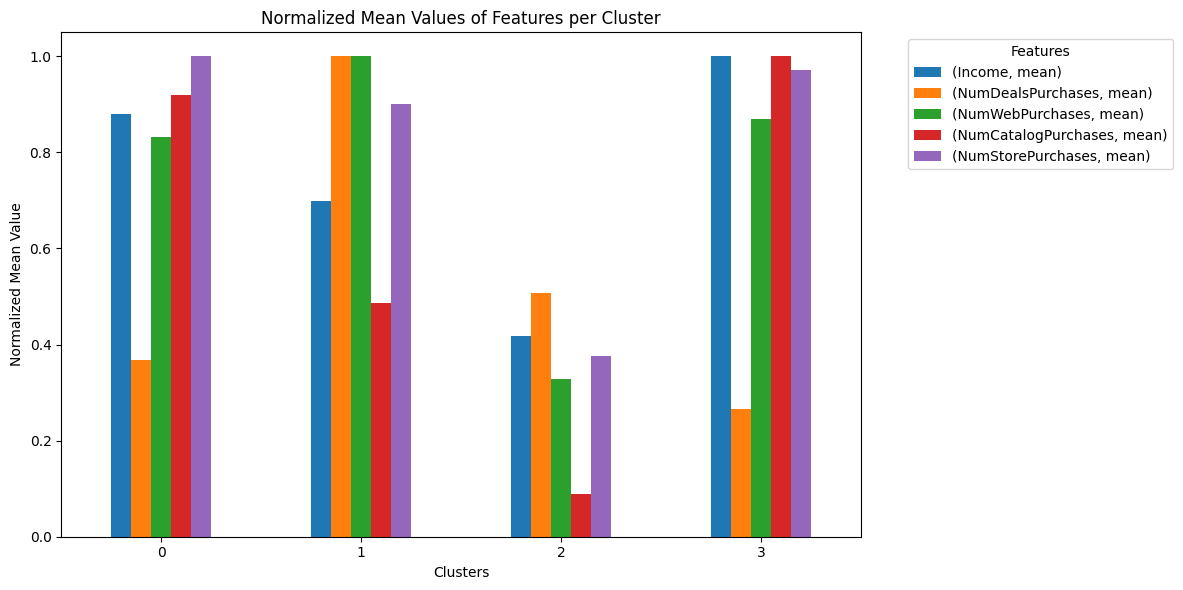

In [49]:
ax = df_normalized.iloc[:, np.r_[0, 7:11]].plot(kind='bar', figsize=(12, 6))

# Add labels and formatting
plt.title('Normalized Mean Values of Features per Cluster')
plt.xlabel('Clusters')
plt.ylabel('Normalized Mean Value')
plt.xticks(rotation=0) # Keeps row labels horizontal
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save or show the plot
plt.savefig('barplot_clusters.png')
plt.show()

In [50]:
from sklearn.decomposition import PCA

In [51]:
ss_market.select_dtypes(include=[np.number]).columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'no_children', 'total_items_bought', 'total_nbr_purchases', 'age'],
      dtype='object')

In [52]:
df_pca=ss_market.select_dtypes(include=[np.number])
pca = PCA(n_components=2).fit(df_pca)
pca_2d = pca.transform(df_pca)

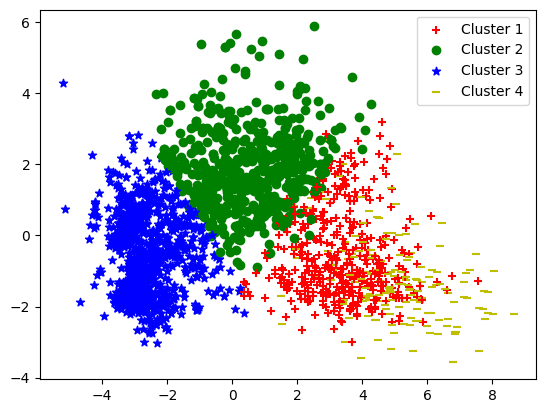

In [53]:
for i in range(0, pca_2d.shape[0]):
    if kprototype.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif kprototype.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif kprototype.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
    elif kprototype.labels_[i] == 3:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='_')
plt.legend([c1, c2, c3,c4], ['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4'])